In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv("dati/square451Hz.dat", delimiter=r"  ", names=["k","V(k)", "Re(k)", "Im(k)", "Abs(k)"], skiprows=2)

/home/rosso/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Text(0, 0.5, '|T|')

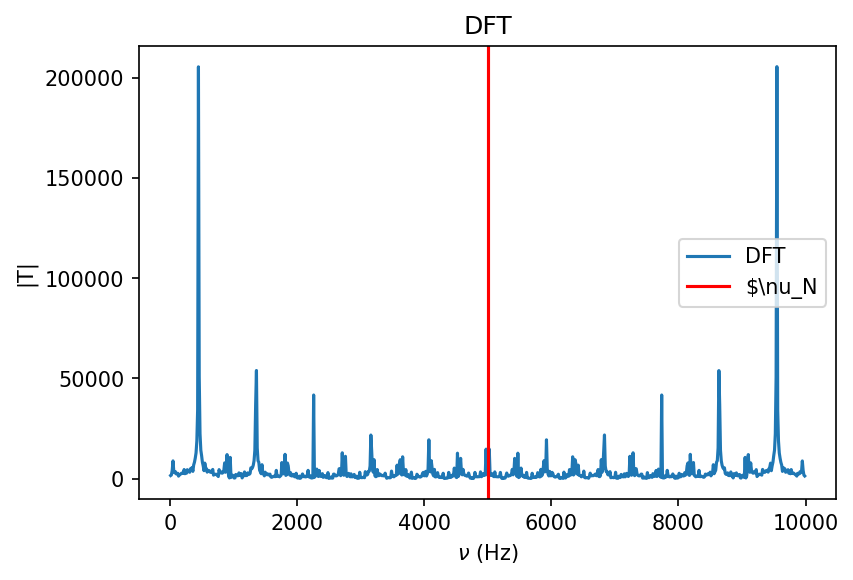

In [3]:
a, b = 1, 800
plt.plot(df["k"][a:b]*12.5, df["Abs(k)"][a:b], label="DFT")
plt.xlabel("$\\nu$ (Hz)")
plt.axvline(5000, label="$\\nu_N", c="r")
plt.legend()
plt.title("DFT")
plt.ylabel("|T|")

In [4]:
AbsT_1 = np.zeros(800)
AbsT_2 = np.zeros(800)
for i in range(10):
    AbsT_1 += pd.read_csv("dati/rumore1_{}.dat".format(str(i+1)), delimiter=r"  ", names=["k","V(k)", "Re(k)", "Im(k)", "Abs(k)"], skiprows=2, )["Abs(k)"]
    AbsT_2 += pd.read_csv("dati/rumore2_{}.dat".format(str(i+1)), delimiter=r"  ", names=["k","V(k)", "Re(k)", "Im(k)", "Abs(k)"], skiprows=2, )["Abs(k)"]

/home/rosso/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Text(0.5, 0, '$\\nu$ (Hz)')

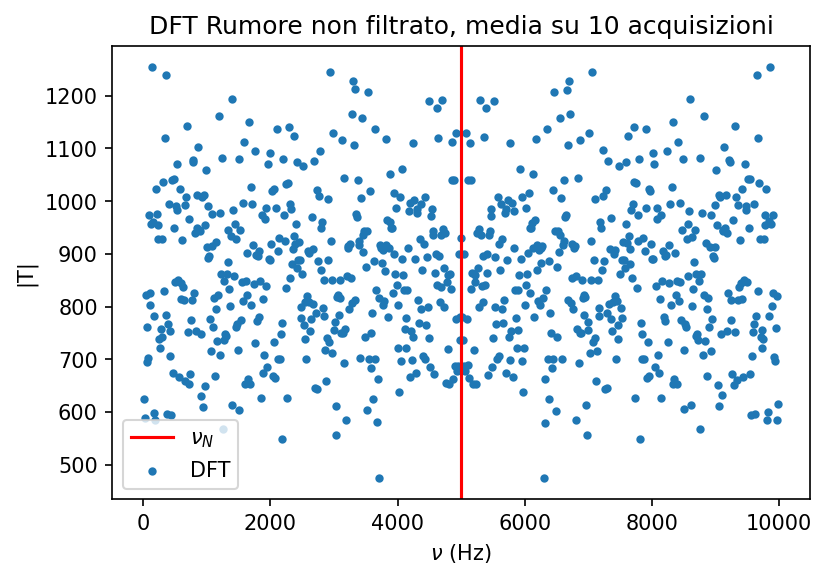

In [5]:
a, b = 1, 800
plt.scatter(df["k"][a:b]*12.5, AbsT_1[a:b]/10, marker=".", label="DFT")
plt.axvline(5000, label="$\\nu_N$", c="r")
plt.legend()
plt.title("DFT Rumore non filtrato, media su 10 acquisizioni")
plt.ylabel("|T|")
plt.xlabel("$\\nu$ (Hz)")



Text(0.5, 0, '$\\nu$ (Hz)')

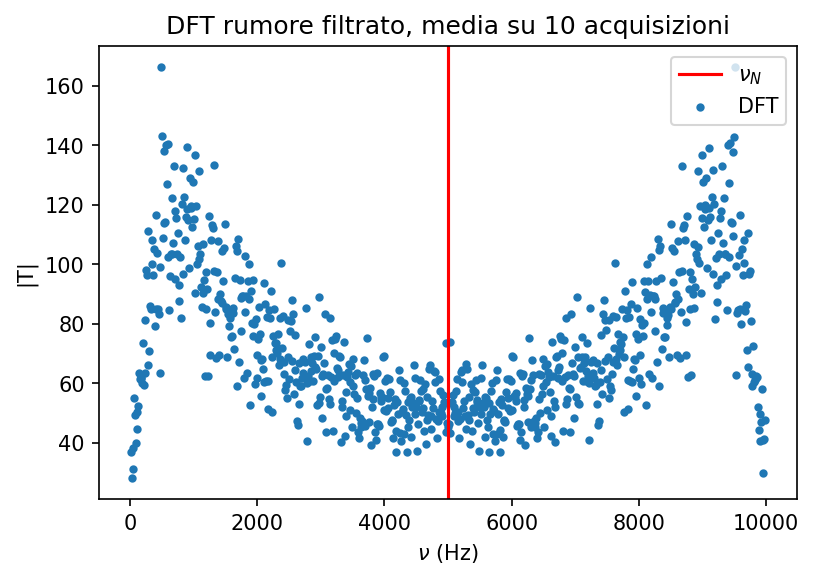

In [6]:
a, b = 1, 800
plt.scatter(df["k"][a:b]*12.5, AbsT_2[a:b]/10, marker=".", label="DFT")
plt.axvline(5000, label="$\\nu_N$", c="r")
plt.legend()
plt.title("DFT rumore filtrato, media su 10 acquisizioni")
plt.ylabel("|T|")
plt.xlabel("$\\nu$ (Hz)")
